In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from gensim import models

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json


In [2]:
dataset = pd.read_json("/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json",lines='True')
dataset.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:

dataset['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [4]:
pd.set_option('display.max_colwidth', None)
dataset['headline'][20:50]+'---'+ dataset['category'][20:50]

20                                        Golden Globes Returning To NBC In January After Year Off-Air---ENTERTAINMENT
21                                              Biden Says U.S. Forces Would Defend Taiwan If China Invaded---POLITICS
22                            Hurricane Fiona Bears Down On Dominican Republic After Pounding Puerto Rico---WORLD NEWS
23                                                           One Dead After Plane Crashes At Reno Air Race---U.S. NEWS
24    ‘Beautiful And Sad At The Same Time’: Ukrainian Cultural Festival Takes On A Deeper Meaning This Year---POLITICS
25                    Family Of American Held In Afghanistan Says He Was Freed By Taliban In Prisoner Swap---U.S. NEWS
26                                                Las Vegas Aces Win First WNBA Title, Chelsea Gray Named MVP---SPORTS
27                                                       World Leaders Pay Respects To Queen Elizabeth II---WORLD NEWS
28                                 James Cameron

In [5]:
import re 
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['headline'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https') 
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)


In [6]:
print(texts[15:30])

['russian cosmonaut valery polyakov who broke record with day stay in space dies at', 'reboot is a clever and not too navel gazey look inside tv reboots', 'maury wills base stealing shortstop for dodgers dies at', 'russian controlled ukrainian regions schedule votes this week to join russia', 'fiona barrels toward turks and caicos islands as category hurricane', 'golden globes returning to nbc in january after year off air', 'biden says u s forces would defend taiwan if china invaded', 'hurricane fiona bears down on dominican republic after pounding puerto rico', 'one dead after plane crashes at reno air race', 'beautiful and sad at the same time ukrainian cultural festival takes on a deeper meaning this year', 'family of american held in afghanistan says he was freed by taliban in prisoner swap', 'las vegas aces win first wnba title chelsea gray named mvp', 'world leaders pay respects to queen elizabeth ii', 'james cameron says he clashed with studio before avatar release', 'french sp

In [7]:
from gensim.models import Word2Vec

In [8]:
sentences = [line.split() for line in texts]

w2v =Word2Vec(sentences, vector_size=100, window=10, workers=4,  min_count=5)

In [9]:
print(sentences[10:30])

[['world', 'cup', 'captains', 'want', 'to', 'wear', 'rainbow', 'armbands', 'in', 'qatar'], ['man', 'sets', 'himself', 'on', 'fire', 'in', 'apparent', 'protest', 'of', 'funeral', 'for', 'japan', 's', 'abe'], ['fiona', 'threatens', 'to', 'become', 'category', 'storm', 'headed', 'to', 'bermuda'], ['twitch', 'bans', 'gambling', 'sites', 'after', 'streamer', 'scams', 'folks', 'out', 'of'], ['virginia', 'thomas', 'agrees', 'to', 'interview', 'with', 'jan', 'panel'], ['russian', 'cosmonaut', 'valery', 'polyakov', 'who', 'broke', 'record', 'with', 'day', 'stay', 'in', 'space', 'dies', 'at'], ['reboot', 'is', 'a', 'clever', 'and', 'not', 'too', 'navel', 'gazey', 'look', 'inside', 'tv', 'reboots'], ['maury', 'wills', 'base', 'stealing', 'shortstop', 'for', 'dodgers', 'dies', 'at'], ['russian', 'controlled', 'ukrainian', 'regions', 'schedule', 'votes', 'this', 'week', 'to', 'join', 'russia'], ['fiona', 'barrels', 'toward', 'turks', 'and', 'caicos', 'islands', 'as', 'category', 'hurricane'], ['gol

In [10]:
words = list(w2v.wv.key_to_index)
print(words[40:50])

['by', 'out', 'an', 'his', 'my', 'says', 'her', 'who', 'best', 'over']


In [11]:
print(len(words))

20345


In [12]:
print( w2v.wv['hurricane'] )

[-0.06362886  0.34013256  0.5313698   0.5336656  -0.80390143 -0.5942066
  0.06109329  0.63200164  0.4213414  -1.2199928  -1.0808907  -0.96952826
  0.17750022 -0.22942999  0.15675159 -1.0259898   0.06174924 -0.35559282
 -0.32649186 -0.22859986 -0.17875808  0.45207375  0.6231859  -0.41971704
  0.23312841  1.9895728  -0.1528784  -0.1670399  -0.39048597  1.2026784
 -0.26111042  1.0853866  -0.1923896   0.54727876  0.56378484 -0.06060545
  0.57948786 -0.23404841 -0.896362   -0.04325113  0.28180397 -0.7639135
 -0.9407228   0.14163533  0.03485078  0.880667   -0.7233866   0.5970138
 -0.3247588   0.5392523   0.8741284  -0.6670377  -0.31627485  0.7277225
 -0.6855406   0.4376404   0.6329367   0.0282483  -0.11500511 -0.40510827
 -0.28151023 -0.05417836 -0.76376325  0.11908404  0.27902138  0.04504738
 -0.01853232 -0.7069684   0.03685378 -0.94524175 -1.3693202   1.0527532
  0.5966143  -0.86106473 -1.249667    0.31106964  0.45844212 -0.1262063
 -0.24084906  1.3986362   0.30412522  1.0112306   0.201373

In [13]:
w2v.wv.similarity('hurricane', 'storm')

0.74474627

In [14]:
w2v.wv.similarity('cameron', 'elizabeth')

0.4926461

In [15]:
print(w2v.wv.most_similar('elizabeth'))

[('buffett', 0.831863284111023), ('warren', 0.8142476081848145), ('huckabee', 0.8039773106575012), ('sarah', 0.8005422949790955), ('fiorina', 0.8004058003425598), ('dnc', 0.8002687096595764), ('romney', 0.7925297617912292), ('nomination', 0.792301595211029), ('carly', 0.7875141501426697), ('graham', 0.7811324000358582)]


In [16]:
print(w2v.wv.most_similar('space'))

[('ocean', 0.7744405269622803), ('garden', 0.759946346282959), ('nasa', 0.7570868730545044), ('giant', 0.7421695590019226), ('weather', 0.7360660433769226), ('jet', 0.7339755296707153), ('apartment', 0.7313798666000366), ('resort', 0.7245429158210754), ('sea', 0.7219192981719971), ('ship', 0.7218566536903381)]


In [17]:
print(w2v.wv.most_similar('caicos'))

[('heatwave', 0.9442818760871887), ('pools', 0.9403197169303894), ('accents', 0.9368206858634949), ('pads', 0.9346755146980286), ('succeeds', 0.9345381259918213), ('nagasu', 0.9335220456123352), ('motel', 0.9332565665245056), ('kreme', 0.9331347942352295), ('encased', 0.9315361976623535), ('butterflies', 0.9306932091712952)]


In [18]:
print(w2v.wv.most_similar(positive=['caicos', 'botswana'], negative=['dominican']))

[('baffles', 0.8998777270317078), ('irina', 0.8857133388519287), ('shayk', 0.8814125657081604), ('je', 0.8810872435569763), ('badu', 0.8740186095237732), ('crater', 0.8737868666648865), ('suis', 0.8735285997390747), ('sans', 0.8728878498077393), ('copeland', 0.8726081848144531), ('daphne', 0.8705361485481262)]


In [19]:
w2v.wv.doesnt_match(['grocery', 'caicos', 'dominican'])

'grocery'

In [20]:
pip install gensim scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
mlxte

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

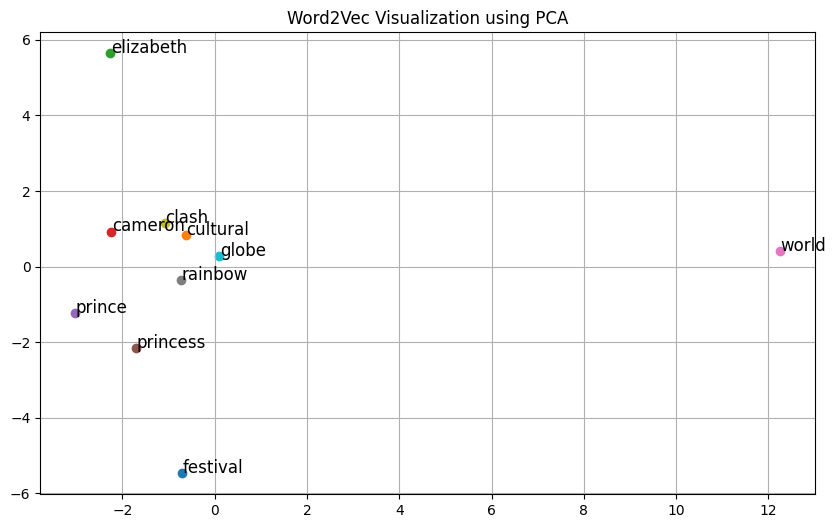

In [22]:


# 3. Choose words to visualize
words_to_visual = ["festival", "cultural", "elizabeth", "cameron", "prince", "princess", "world", "rainbow",
                  "clash","globe"]

# 4. Get their vectors
word_vectors = [w2v.wv[word] for word in words_to_visual]

# 5. Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

# 6. Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words_to_visual):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
    
plt.title("Word2Vec Visualization using PCA")
plt.grid(True)
plt.show()
